In [1]:
import sys
sys.path.append("../../../../../src")
import nanonets
import nanonets_utils
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
import numpy as np
import pandas as pd
import networkx as nx

%matplotlib inline

plt.style.use(["science","bright","grid"])

In [2]:
time_step       = 1e-7
radius          = 1000000.0
# radius          = 10.0
eq_step         = 0
N_min, N_max    = 2, 12
N_vals          = np.arange(N_min, N_max)
# path            = '/home/j/j_mens07/phd/data/2_funding_period/potential/magic_cable/magnitude/'
path            = '/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/magic_cable/direct_current/'
data_string     = {N : pd.read_csv(f"{path}Nx={N}_Ny=1_Nz=1_Ne=2_{radius}.csv").loc[eq_step:,:].reset_index(drop=True) for N in N_vals}
# data_network    = {N : pd.read_csv(f"{path}Nx={N}_Ny={N}_Nz=1_Ne=8_{radius}.csv").loc[eq_step:,:].reset_index(drop=True) for N in [3,5,7,9,11,13]}
states_string   = {N : pd.read_csv(f"{path}mean_state_Nx={N}_Ny=1_Nz=1_Ne=2_{radius}.csv").loc[eq_step:,:].reset_index(drop=True) for N in N_vals}
# states_network  = {N : pd.read_csv(f"{path}mean_state_Nx={N}_Ny={N}_Nz=1_Ne=8_{radius}.csv").loc[eq_step:,:].reset_index(drop=True) for N in [3,5,7,9,11,13]}
currents_string = {N : pd.read_csv(f"{path}net_currents_Nx={N}_Ny=1_Nz=1_Ne=2_{radius}.csv").loc[eq_step:,:].reset_index(drop=True) for N in N_vals}
t_vals          = np.arange(len(data_string[2]))*time_step*1e6
x_vals          = data_string[2]['E0'].values*1000

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/magic_cable/direct_current/Nx=2_Ny=1_Nz=1_Ne=2_1000000.0.csv'

## Output Response

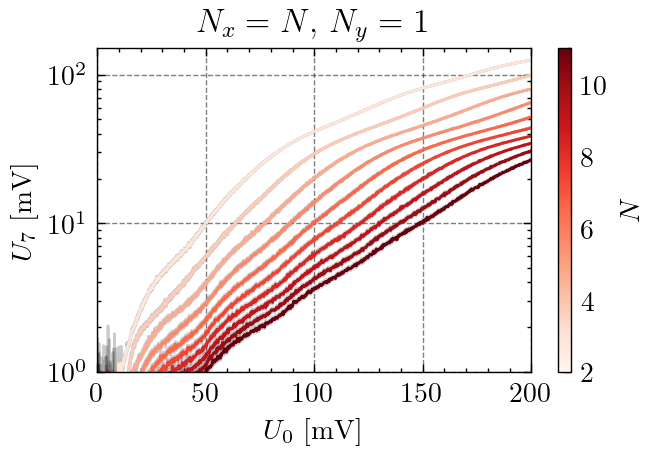

In [3]:
cmap    = plt.get_cmap("Reds")
fig, ax = plt.subplots(dpi=200)
fig.set_figheight(fig.get_figheight()*0.8)

for i, (key, df) in enumerate(data_string.items()):

    val     = df['Current'].values*1000
    val_e   = df['Error'].values*1000
    ax.plot(x_vals, val, c=cmap((i+1)/len(N_vals)))
    ax.fill_between(x_vals, val-val_e, val+val_e, color='black', alpha=0.2)

ax.set_xlabel("$U_0$ [mV]")
ax.set_ylabel("$U_7$ [mV]")
ax.set_xlim(0,200)
ax.set_ylim(1,150)
ax.set_yscale('log')
ax.set_title("$N_x = N$, $N_y = 1$")

norm    = mpl.colors.Normalize(vmin=N_min, vmax=N_max-1)
cbar    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

fig.colorbar(cbar, ax=ax, label='$N$', aspect=25)
# fig.savefig(f"../plots/magnitude/input_output_string_radius_{radius}.svg", bbox_inches='tight', transparent=True)
# fig.savefig(f"../plots/magnitude/input_output_string_radius_{radius}.pdf", bbox_inches='tight', transparent=False)

## NP Response

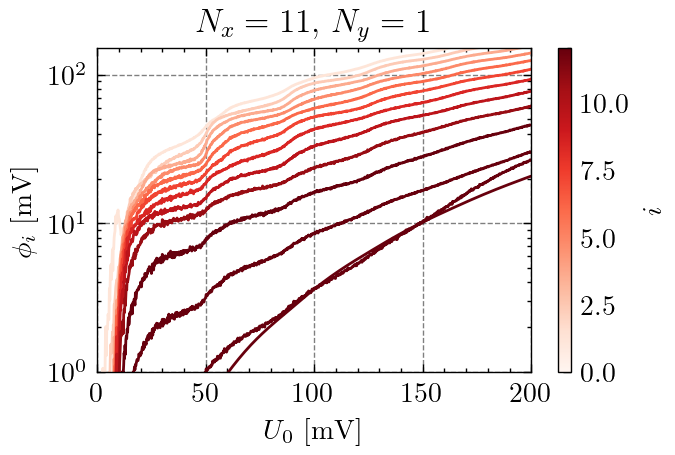

In [33]:
N_NP    = 11
df      = states_string[N_NP]
cmap    = plt.get_cmap("Reds")
fig, ax = plt.subplots(dpi=200)
fig.set_figheight(fig.get_figheight()*0.8)

for i in range(N_NP+2):

    val     = df[f"{i}"].values*1000
    ax.plot(x_vals, val, c=cmap((i+1)/len(N_vals)))

ax.set_xlabel("$U_0$ [mV]")
ax.set_ylabel("$\phi_i$ [mV]")
ax.set_xlim(0,200)
ax.set_ylim(1,150)
ax.set_yscale('log')
ax.set_title(f"$N_x = {N_NP}$, $N_y = 1$")

norm    = mpl.colors.Normalize(vmin=0, vmax=N_NP+1)
cbar    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

fig.colorbar(cbar, ax=ax, label='$i$', aspect=25)

## Currents

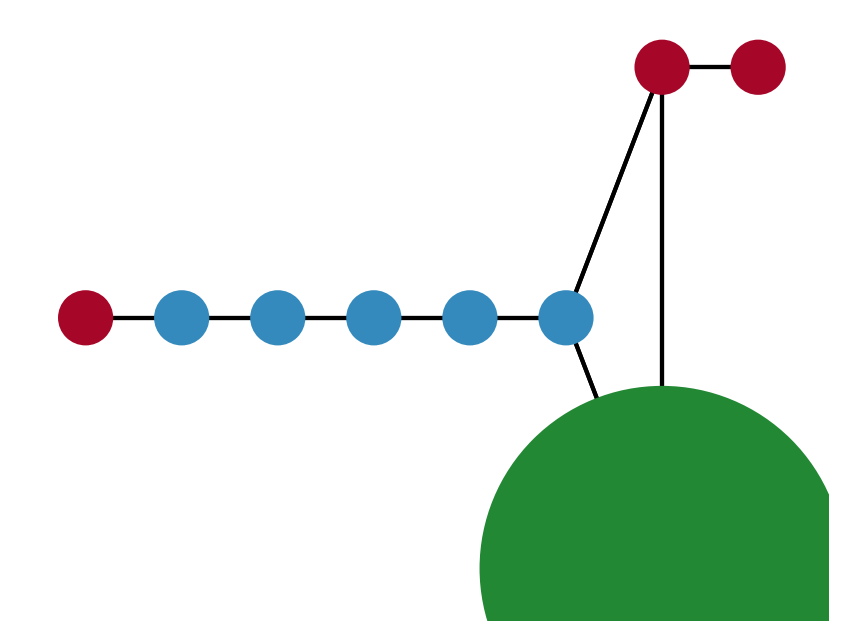

In [55]:
N   = 5
df  = currents_string[N]
G   = nx.DiGraph()
G.add_nodes_from(np.arange(N+3))
x   = [(eval(col)[0],eval(col)[1]) for col in df.columns]
G.add_edges_from(x)

# weights     = 0.5*np.array([G[u][v]['weight'] for u, v in G.edges()])*1e8
pos         = {i+2 : [i+1,0] for i in range(N)}
pos[0]      = [0,0]
pos[1]      = [N+2,0.5]
pos[N+2]    = [N+1,-0.5]
pos[N+3]    = [N+1,0.5]
colors      = [nanonets_utils.red_color,nanonets_utils.red_color] + [nanonets_utils.blue_color for i in range(N)] + [nanonets_utils.green_color,nanonets_utils.red_color]
np_size     = 150
sizes       = np.repeat(np_size,N+4)
sizes[N+2]  = 50*np_size

fig, ax = plt.subplots(dpi=300)
nx.draw_networkx(G, pos, ax=ax, node_color=colors, node_size=sizes, arrows=False, with_labels=False)
# nx.draw_networkx_labels(G, pos, ax=ax)
# nx.draw_networkx_edges(G, pos, ax=ax)
ax.axis('off')
ax.grid(False)
fig.savefig("../plots/sample_network_plot.svg", transparent=True)

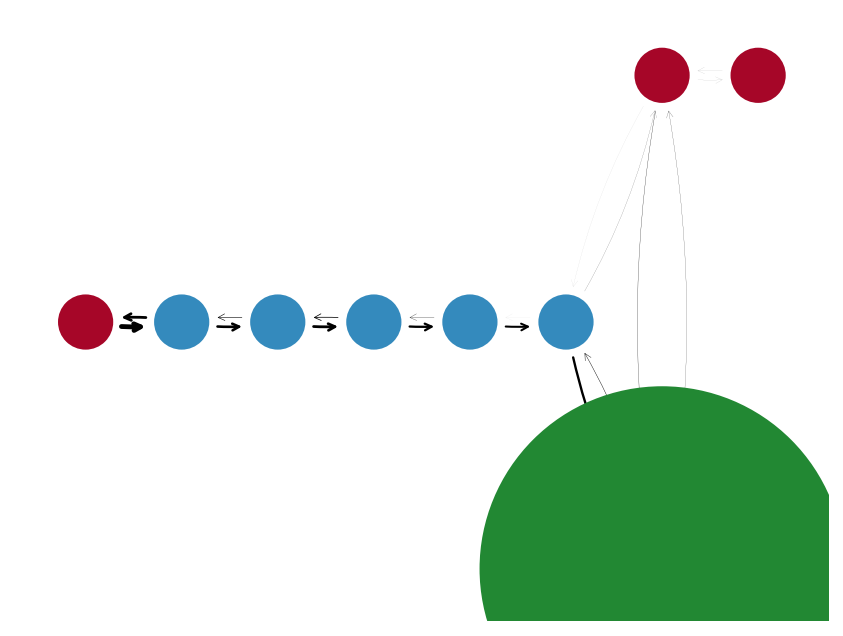

In [36]:
N   = 5
df  = currents_string[N]
G   = nx.DiGraph()
G.add_nodes_from(np.arange(N+3))
x   = [(eval(col)[0],eval(col)[1], df[col][:100].mean()) for col in df.columns]
G.add_weighted_edges_from(x)

weights     = 0.5*np.array([G[u][v]['weight'] for u, v in G.edges()])*1e8
pos         = {i+2 : [i+1,0] for i in range(N)}
pos[0]      = [0,0]
pos[1]      = [N+2,0.5]
pos[N+2]    = [N+1,-0.5]
pos[N+3]    = [N+1,0.5]
colors      = [nanonets_utils.red_color,nanonets_utils.red_color] + [nanonets_utils.blue_color for i in range(N)] + [nanonets_utils.green_color,nanonets_utils.red_color]
np_size     = 150
sizes       = np.repeat(np_size,N+4)
sizes[N+2]  = 50*np_size

fig, ax = plt.subplots(dpi=300)
nx.draw_networkx_nodes(G, pos, ax=ax, node_color=colors, node_size=sizes)
# nx.draw_networkx_labels(G, pos, ax=ax)
nx.draw_networkx_edges(G, pos, width=weights, arrowsize=4, arrowstyle='->', connectionstyle='arc3,rad=0.1', ax=ax)
ax.axis('off')
ax.grid(False)

## Network Topology

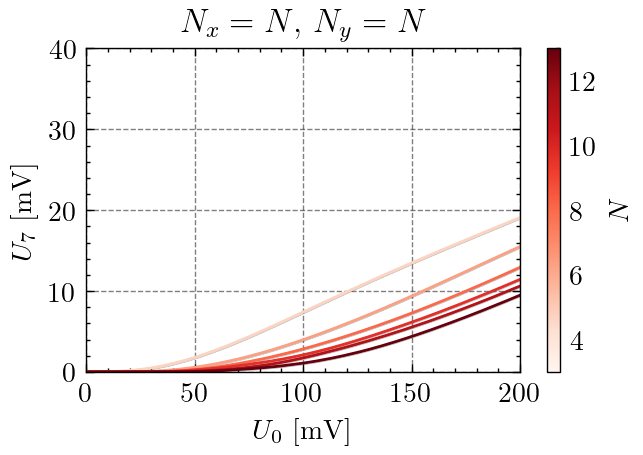

In [10]:
cmap    = plt.get_cmap("Reds")
fig, ax = plt.subplots(dpi=200)
fig.set_figheight(fig.get_figheight()*0.8)

for i, (key, df) in enumerate(data_network.items()):

    val     = df['Current'].values*1000
    val_e   = df['Error'].values*1000
    ax.plot(x_vals, val, c=cmap((i+1)/len(data_network.keys())))
    ax.fill_between(x_vals, val-val_e, val+val_e, color='black', alpha=0.2)

ax.set_xlabel("$U_0$ [mV]")
ax.set_ylabel("$U_7$ [mV]")
ax.set_xlim(0,200)
ax.set_ylim(0,40)
ax.set_title("$N_x = N$, $N_y = N$")

norm    = mpl.colors.Normalize(vmin=3, vmax=13)
cbar    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

fig.colorbar(cbar, ax=ax, label='$N$', aspect=25)
fig.savefig(f"../plots/magnitude/input_output_network_radius_{radius}.svg", bbox_inches='tight', transparent=True)
fig.savefig(f"../plots/magnitude/input_output_network_radius_{radius}.pdf", bbox_inches='tight', transparent=False)